In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2340/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1480, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649
2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...


Fetching news for month: 2025-12...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 4874


,date,title,source
0,"Wed, 29 Jan 2020 08:00:00 GMT",Reliance Industries plans to market ‘Plastic t...,{'href': 'https://www.thehindubusinessline.com...
1,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
2,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
3,"Thu, 02 Jan 2020 08:00:00 GMT",Mukesh Ambani: Asia's richest man takes on ret...,"{'href': 'https://www.bbc.com', 'title': 'BBC'}"
4,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

| 

/ 

- 

\ 

| 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done
Solving environment: - 

\ 

done




==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.1              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.3               |     pyhd8ed1ab_0         221 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-






certifi-2025.11.12   | 153 KB    |                                       |   0% 





ca-certificates-2025 | 149 KB    |                                       |   0% 




regex-2025.11.3      | 402 KB    | #4                                    |   4% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 



joblib-1.5.3         | 221 KB    | ##6                                   |   7% 





openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 





joblib-1.5.3         | 221 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 



nltk-3.9.2           | 1.1 MB    | ########################1             |  65% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 


conda-25.11.1        | 1.2 MB    | 4                                     |   1% 


conda-25.11.1        | 1.2 MB    | ######8                               |  19% 


conda-25.11.1        | 1.2 MB    | ###################6                  |  53% 


conda-25.11.1        | 1.2 MB    | #################################9    |  92% 
conda-25.11.1        | 1.2 MB    | ##################################### | 100% 



                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: / 

done
Verifying transaction: \ 

| 

done
Executing transaction: - 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Reliance Industries plans to market ‘Plastic t...,reliance industry plan market plastic road ini...
1,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
2,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
3,Mukesh Ambani: Asia's richest man takes on ret...,mukesh ambani asia richest man take retail gia...
4,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-12-19 14:47:58.032074: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


12/19/2025 02:47:59 PM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


12/19/2025 02:48:00 PM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]


Starting sentiment analysis with FinBERT. This will take a very long time...


  Processed 64/4874 headlines...


  Processed 128/4874 headlines...


  Processed 192/4874 headlines...


  Processed 256/4874 headlines...


  Processed 320/4874 headlines...


  Processed 384/4874 headlines...


  Processed 448/4874 headlines...


  Processed 512/4874 headlines...


  Processed 576/4874 headlines...


  Processed 640/4874 headlines...


  Processed 704/4874 headlines...


  Processed 768/4874 headlines...


  Processed 832/4874 headlines...


  Processed 896/4874 headlines...


  Processed 960/4874 headlines...


  Processed 1024/4874 headlines...


  Processed 1088/4874 headlines...


  Processed 1152/4874 headlines...


  Processed 1216/4874 headlines...


  Processed 1280/4874 headlines...


  Processed 1344/4874 headlines...


  Processed 1408/4874 headlines...


  Processed 1472/4874 headlines...


  Processed 1536/4874 headlines...


  Processed 1600/4874 headlines...


  Processed 1664/4874 headlines...


  Processed 1728/4874 headlines...


  Processed 1792/4874 headlines...


  Processed 1856/4874 headlines...


  Processed 1920/4874 headlines...


  Processed 1984/4874 headlines...


  Processed 2048/4874 headlines...


  Processed 2112/4874 headlines...


  Processed 2176/4874 headlines...


  Processed 2240/4874 headlines...


  Processed 2304/4874 headlines...


  Processed 2368/4874 headlines...


  Processed 2432/4874 headlines...


  Processed 2496/4874 headlines...


  Processed 2560/4874 headlines...


  Processed 2624/4874 headlines...


  Processed 2688/4874 headlines...


  Processed 2752/4874 headlines...


  Processed 2816/4874 headlines...


  Processed 2880/4874 headlines...


  Processed 2944/4874 headlines...


  Processed 3008/4874 headlines...


  Processed 3072/4874 headlines...


  Processed 3136/4874 headlines...


  Processed 3200/4874 headlines...


  Processed 3264/4874 headlines...


  Processed 3328/4874 headlines...


  Processed 3392/4874 headlines...


  Processed 3456/4874 headlines...


  Processed 3520/4874 headlines...


  Processed 3584/4874 headlines...


  Processed 3648/4874 headlines...


  Processed 3712/4874 headlines...


  Processed 3776/4874 headlines...


  Processed 3840/4874 headlines...


  Processed 3904/4874 headlines...


  Processed 3968/4874 headlines...


  Processed 4032/4874 headlines...


  Processed 4096/4874 headlines...


  Processed 4160/4874 headlines...


  Processed 4224/4874 headlines...


  Processed 4288/4874 headlines...


  Processed 4352/4874 headlines...


  Processed 4416/4874 headlines...


  Processed 4480/4874 headlines...


  Processed 4544/4874 headlines...


  Processed 4608/4874 headlines...


  Processed 4672/4874 headlines...


  Processed 4736/4874 headlines...


  Processed 4800/4874 headlines...


  Processed 4864/4874 headlines...


  Processed 4874/4874 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,reliance industry plan market plastic road ini...,neutral
1,year reliance becomes india digital champion v...,neutral
2,reliance industry starting roll new ecommerce ...,neutral
3,mukesh ambani asia richest man take retail gia...,neutral
4,mukesh ambanis reliance industry india answer ...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2340/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2340/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501526,719.791148,682.839761,719.791148,32545850,685.892970,54.332541,-0.2
2020-01-21,686.194946,691.540813,680.871417,683.823983,18922720,686.669455,54.600572,0.0
2020-01-22,685.948792,691.943331,684.942246,690.713115,10322817,686.607138,49.591919,0.0
2020-01-23,683.041138,689.796156,680.289905,687.358062,11247739,686.278015,47.885882,0.0
2020-01-24,680.670105,687.290921,679.328024,683.108140,14628445,686.918684,54.701018,0.0


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1462,2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1548.478577,58.266444,0.166667
1463,2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1549.657148,56.812546,0.166667
1464,2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1547.685721,36.832064,0.166667
1465,2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1546.328578,40.537839,0.166667
1466,2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829,1544.678580,38.006234,0.166667


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.4
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.5
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.5
2020-01-23,0.240906,0.078830,0.207274,0.447049,0.5
2020-01-24,0.238919,0.102524,0.207850,0.522907,0.5


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1407, 60, 5)
Shape of y_data: (1407,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1125, 60, 5)
y_train shape: (1125,)
X_test shape: (282, 60, 5)
y_test shape: (282,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-12-19 14:50:08.512356: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 1134.53 INR
R-squared (R²) Score: -109.57


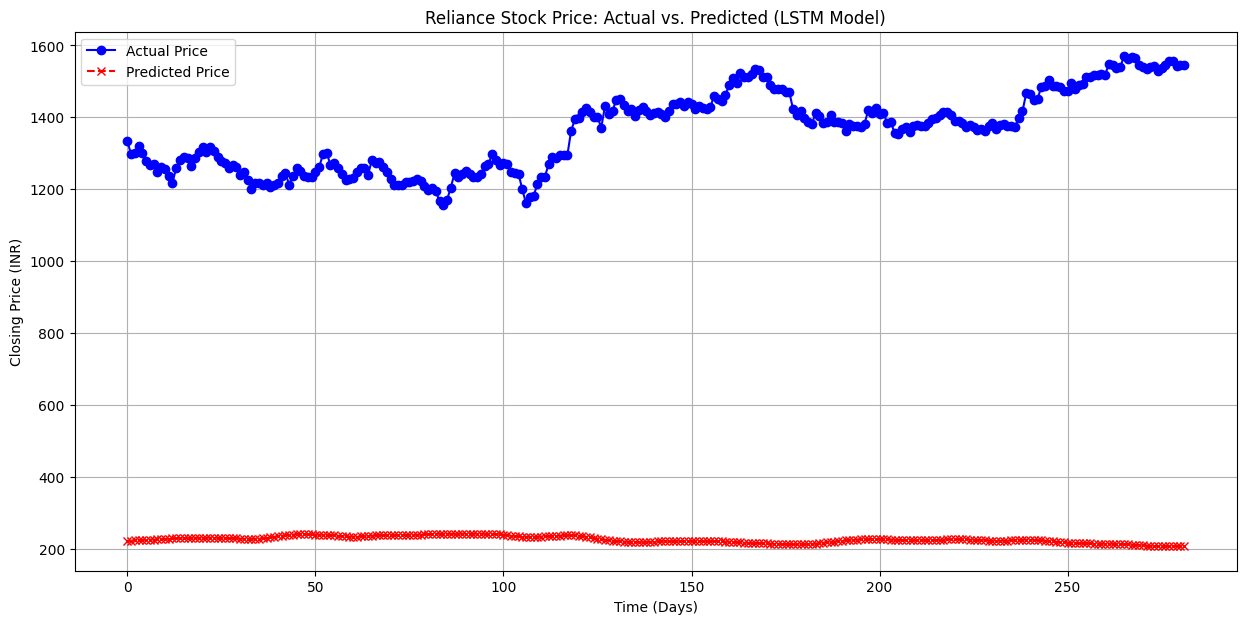

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1:09 2s/step - loss: 0.6230

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4827

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3926

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3321

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2916

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2612

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2372

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2180

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1892

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1779

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1681

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1596 - val_loss: 0.0019


Epoch 2/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0099

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0089

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0091

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0090

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0086

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0084

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0083

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0081

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0080

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0079

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0078

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0077

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0077 - val_loss: 0.0019


Epoch 3/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0042

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0047

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0051

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0051

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0052 - val_loss: 0.0016


Epoch 4/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0073

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0076

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0071

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0066

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0062

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0061

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0057

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0056 - val_loss: 0.0014


Epoch 5/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0060

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0046 - val_loss: 0.0018


Epoch 6/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0049

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0045

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0046 - val_loss: 0.0010


Epoch 7/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0046

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0049

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0050

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0050

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0047 - val_loss: 0.0015


Epoch 8/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0042 - val_loss: 0.0016


Epoch 9/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0051

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0053

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0050

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0045

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0045 - val_loss: 0.0011


Epoch 10/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0044

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0044

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042 - val_loss: 0.0011


Epoch 11/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0032

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0034 - val_loss: 0.0010


Epoch 12/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0040

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0040 - val_loss: 0.0013


Epoch 13/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0054

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0050

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0045

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0040 - val_loss: 0.0015


Epoch 14/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0018

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - val_loss: 0.0021


Epoch 15/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0038

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - val_loss: 9.8605e-04


Epoch 16/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0051

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033 - val_loss: 0.0014


Epoch 17/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0035

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0037

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0032 - val_loss: 8.3579e-04


Epoch 18/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0018

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030 - val_loss: 0.0017


Epoch 19/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0037

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030 - val_loss: 9.8996e-04


Epoch 20/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0021

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0027 - val_loss: 0.0015


Epoch 21/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028 - val_loss: 0.0049


Epoch 22/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0033

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0039

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0038

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0036

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0035 - val_loss: 0.0019


Epoch 23/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028 - val_loss: 0.0013


Epoch 24/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028 - val_loss: 7.5065e-04


Epoch 25/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028 - val_loss: 0.0029


Epoch 26/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0032 - val_loss: 7.1851e-04


Epoch 27/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - val_loss: 9.4999e-04


Epoch 28/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0029

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0029 - val_loss: 8.1041e-04


Epoch 29/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0029 - val_loss: 6.5121e-04


Epoch 30/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0014

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - val_loss: 0.0018


Epoch 31/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0024

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 8.5143e-04


Epoch 32/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0024

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0026 - val_loss: 9.2054e-04


Epoch 33/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0018

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024 - val_loss: 7.9154e-04


Epoch 34/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0016

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0026 - val_loss: 6.5897e-04


Epoch 35/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030 - val_loss: 7.5917e-04


Epoch 36/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0018

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030 - val_loss: 0.0035


Epoch 37/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0044

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0029 - val_loss: 0.0012


Epoch 38/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0022

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0023 - val_loss: 0.0011


Epoch 39/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - val_loss: 0.0012


Epoch 40/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024 - val_loss: 7.7359e-04


Epoch 41/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0010

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024 - val_loss: 0.0030


Epoch 42/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0027

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027 - val_loss: 0.0026


Epoch 43/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0041

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - val_loss: 6.8078e-04


Epoch 44/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 9/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021 - val_loss: 5.5190e-04


Epoch 45/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0026

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - val_loss: 8.0267e-04


Epoch 46/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - val_loss: 0.0011


Epoch 47/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 9.2927e-04

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0013    

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0015

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0016

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0018

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021 - val_loss: 0.0015


Epoch 48/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - val_loss: 5.5228e-04


Epoch 49/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0022

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021 - val_loss: 5.1502e-04


Epoch 50/50


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025

 4/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

 7/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0025

10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024

16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0023 - val_loss: 5.2985e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

12/19/2025 02:50:57 PM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
